<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/AAPL_JumpDiffusion_Model_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
Current AAPL stock price: $165.96025321844155
Current option price: $9.35
Predicted option price: $1.7441529874279809
Price difference: $7.605847012572019
Consider selling the stock.


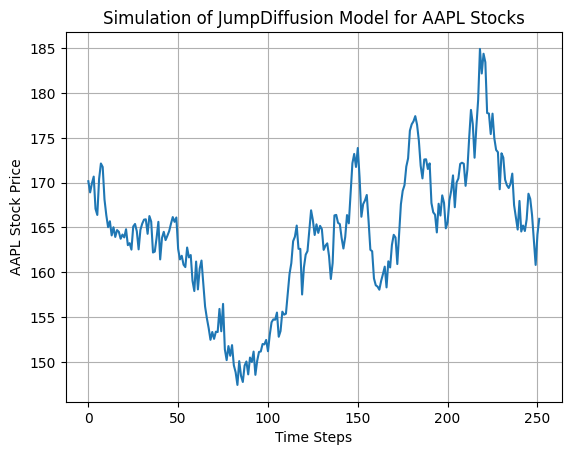

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

import yfinance as yf

# Define function to get stock price from Yahoo Finance
def get_stock_price(symbol, start_date):
    df = yf.download(symbol, start=start_date)
    return df['Adj Close'][0]

# Define functions for the JumpDiffusion model and the rest of the code...

# Define parameters for the JumpDiffusion model
start_date = '2022-01-01'  # Specify the start date for collecting the stock price
S0 = get_stock_price('AAPL', start_date)  # Get the initial stock price of AAPL from Yahoo Finance
r = 0.05
sigma = 0.2
lamda = 0.1
mu = 0.05
delta_t = 1/252
num_steps = 252

# Define functions for the JumpDiffusion model
def jump_diffusion_model(S0, r, sigma, lamda, mu, delta_t, num_steps):
    """
    Simulates the JumpDiffusion model for AAPL stocks.

    Parameters:
    - S0: Initial stock price of AAPL
    - r: Risk-free interest rate
    - sigma: Volatility of AAPL stock
    - lamda: Intensity of jump arrivals
    - mu: Mean jump size
    - delta_t: Time step size
    - num_steps: Number of steps in the simulation

    Returns:
    - stock_prices: Array of simulated stock prices of AAPL over time
    """
    stock_prices = np.zeros(num_steps)
    stock_prices[0] = S0

    for i in range(1, num_steps):
        z1 = np.random.normal(0, 1)
        z2 = np.random.normal(0, 1)
        N = np.random.poisson(lamda * delta_t)

        stock_prices[i] = stock_prices[i-1] * (1 + r * delta_t + sigma * np.sqrt(delta_t) * z1)
        stock_prices[i] += stock_prices[i-1] * (mu - 0.5 * sigma**2) * N * delta_t
        stock_prices[i] += stock_prices[i-1] * sigma * np.sqrt(N * delta_t) * z2

    return stock_prices

# Define parameters for the JumpDiffusion model
S0 = 170.16  # Initial stock price of AAPL
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility of AAPL stock
lamda = 0.1  # Intensity of jump arrivals
mu = 0.05  # Mean jump size
delta_t = 1/252  # Time step size (daily data)
num_steps = 252  # Number of steps in the simulation (1 year)

# Generate simulated stock prices using the JumpDiffusion model
stock_prices = jump_diffusion_model(S0, r, sigma, lamda, mu, delta_t, num_steps)

# Obtain current market prices of AAPL stocks and options
current_stock_price = stock_prices[-1]
current_option_price = 9.35  # Example: Jun17 $170 Call option price

# Compare market prices with predicted prices
predicted_option_price = stock_prices[-1] - stock_prices[-2]  # Example: Predicted option price based on price convergence
price_difference = current_option_price - predicted_option_price

# Output the comparison results
print(f"Current AAPL stock price: ${current_stock_price}")
print(f"Current option price: ${current_option_price}")
print(f"Predicted option price: ${predicted_option_price}")
print(f"Price difference: ${price_difference}")

# Plot the simulated stock prices
plt.plot(stock_prices)
plt.xlabel('Time Steps')
plt.ylabel('AAPL Stock Price')
plt.title('Simulation of JumpDiffusion Model for AAPL Stocks')
plt.grid(True)

# Determine whether to buy or sell the stock based on the price difference
if price_difference > 0:
    print("Consider selling the stock.")
elif price_difference < 0:
    print("Consider buying the stock.")
else:
    print("No specific recommendation. Monitor the market closely.")

# Show the plot of simulated stock prices
plt.show()

plt.show()


The "JumpDiffusion" model is a mathematical model used to simulate the price dynamics of a financial asset, such as stocks, by incorporating both continuous and discontinuous (jump) components. In the provided code, the function jump_diffusion_model() is used to simulate the JumpDiffusion model specifically for AAPL (Apple Inc.) stocks.

Here's a breakdown of how the jump_diffusion_model() function works:

It takes several input parameters, including the initial stock price S0, risk-free interest rate r, volatility of the stock sigma, intensity of jump arrivals lamda, mean jump size mu, time step size delta_t, and the number of steps in the simulation num_steps.

The function initializes an array stock_prices to store the simulated stock prices over time. The initial stock price S0 is assigned to the first element of this array.

The function then enters a loop that iterates num_steps - 1 times (from the second step onward) to simulate the stock price dynamics over time.

Within each iteration, the function generates two random numbers z1 and z2 from a standard normal distribution and a random number N from a Poisson distribution with parameter lamda * delta_t.

The current stock price is updated based on the JumpDiffusion model equation, which incorporates the continuous component (drift and volatility) as well as the jump component. The updated stock price is stored in the stock_prices array.

After the loop completes, the function returns the array of simulated stock prices stock_prices.

By calling this jump_diffusion_model() function with appropriate input parameters, you can obtain a simulation of AAPL stock prices based on the JumpDiffusion model. The rest of the code uses this simulation to compare market prices with predicted prices and provides recommendations based on the price difference.

Please note that the JumpDiffusion model is a simplified representation of stock price dynamics, and the simulated results may not precisely reflect actual market behavior.